# `Mall Customers Clustring (KMeans)`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid')

## Data Info

In [2]:
df = pd.read_csv('E:/Epsilon/Instructor/Projects/Clustering/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.drop(['CustomerID' , 'Gender'] , axis = 1 , inplace = True )

## EDA

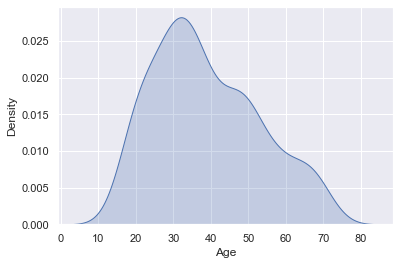

In [6]:
sns.kdeplot(df['Age'] , shade = True)
plt.show()

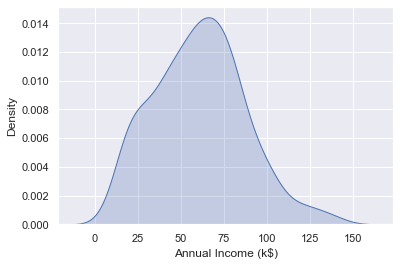

In [7]:
sns.kdeplot(df['Annual Income (k$)'] , shade = True )
plt.show()

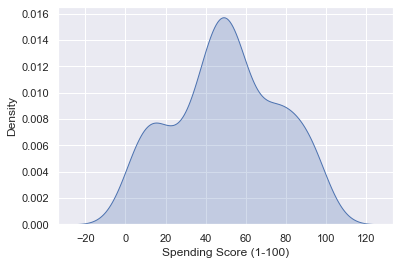

In [8]:
sns.kdeplot(df['Spending Score (1-100)'] , shade=True )
plt.show()

<AxesSubplot:>

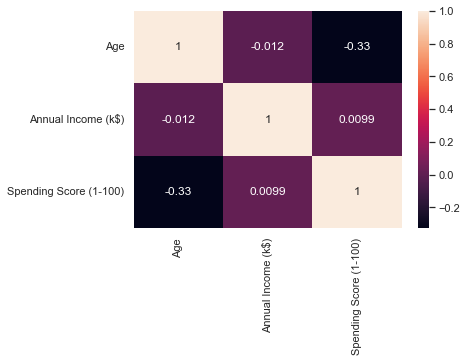

In [9]:
sns.heatmap(df.corr() , annot = True)

## Modeling with KMeans

In [10]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from kneed import KneeLocator

###### try with 2 combinations  of features

In [11]:
df1 = df[['Age' , 'Spending Score (1-100)']]

In [12]:
sclr = StandardScaler()
df1[df1.columns] = sclr.fit_transform(df1[df1.columns])
df1.head()

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


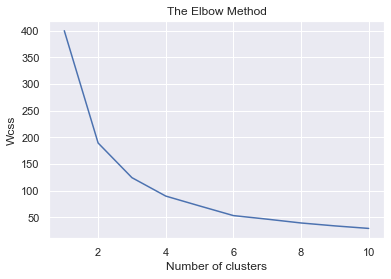

In [13]:
# Elbow method
wcss = []
for k in range(1 , 11):
    Model = KMeans(n_clusters = k, random_state=42)
    Model.fit(df1)
    wcss.append(Model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

In [18]:
Model = KMeans(n_clusters=5)
Model.fit(df1)
df1 ['Cluster'] = Model.predict(df1)
df1.head()

,Age,Spending Score (1-100),Cluster
0,-1.424569,-0.434801,1
1,-1.281035,1.195704,2
2,-1.352802,-1.715913,0
3,-1.137502,1.040418,2
4,-0.563369,-0.395980,1


In [19]:
centers = Model.cluster_centers_

In [20]:
print(centers)

[[ 2.88860926e-01 -1.35762233e+00  4.47916667e+00]
 [-9.88302861e-01  1.06248482e-02  1.00000000e+00]
 [-6.22544556e-01  1.24814723e+00  3.00000000e+00]
 [ 1.86593393e+00 -1.35875462e-02 -1.33226763e-15]
 [ 5.90717442e-01 -1.65149018e-01  2.00000000e+00]]


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

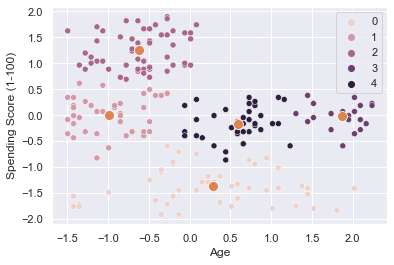

In [21]:
sns.scatterplot(data = df1 , x = 'Age' , y = 'Spending Score (1-100)' , hue = 'Cluster')
sns.scatterplot(x = centers[ : , 0 ] , y = centers[ : , 1 ] , s = 100  )

In [33]:
silhouette_score(df1[['Spending Score (1-100)' , 'Age']],df1['Cluster'])

0.4213038168414008

###### second try cpmbination

In [22]:
df2 = df[['Spending Score (1-100)' , 'Annual Income (k$)']]

In [23]:
scaler = StandardScaler()
df2[df2.columns] = scaler.fit_transform(df2[df2.columns])

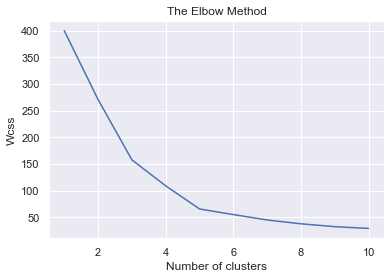

In [24]:
# Elbow method
wcss = []
for k in range(1 , 11):
    Model = KMeans(n_clusters = k, random_state=42)
    Model.fit(df2)
    wcss.append(Model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

In [25]:
Model = KMeans(n_clusters = 5)

In [26]:
Model.fit(df2)

KMeans(n_clusters=5)

In [27]:
df2['Cluster'] = Model.predict(df2)

In [28]:
centroids = Model.cluster_centers_

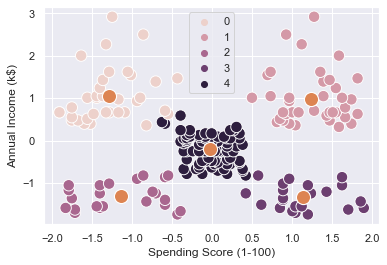

In [29]:
sns.scatterplot(data = df2 , x = 'Spending Score (1-100)' , y = 'Annual Income (k$)' , hue = 'Cluster' , s = 130)
sns.scatterplot(x = centroids[ : , 0] , y = centroids[ : , 1] , s = 200 )
plt.show()

In [30]:
centroids

array([[-1.28443907,  1.05500302],
       [ 1.23950275,  0.99158305],
       [-1.13696536, -1.30751869],
       [ 1.13217788, -1.32954532],
       [-0.02645617, -0.20091257]])

In [31]:
# check distribution of clusters
df2.Cluster.value_counts(normalize=True)

4    0.405
1    0.195
0    0.175
2    0.115
3    0.110
Name: Cluster, dtype: float64

##### Model Evaluation

In [32]:
silhouette_score(df2[['Spending Score (1-100)' , 'Annual Income (k$)']],df2['Cluster'])

0.5546571631111091

# Profiling

------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

#### use whole data to cluster it

In [34]:
df[df.columns] = scaler.fit_transform(df[df.columns])

In [35]:
inertia = []
for k in range(2 , 20):
    Model = KMeans(n_clusters = k)
    Model.fit(df)
    inertia.append(Model.inertia_)

<AxesSubplot:>

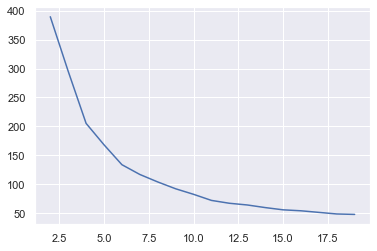

In [36]:
sns.lineplot(x = range(2 , 20) , y = inertia)

In [ ]:
#KneeLocator(x = range(2 , 20) , y = inertia , curve = 'convex' , direction = 'decreasing').elbow

In [37]:
Model = KMeans(n_clusters = 6)
Model.fit(df)

KMeans(n_clusters=6)

In [38]:
df['Cluster'] = Model.predict(df)

In [39]:
# check distribution of clusters
df.Cluster.value_counts(normalize=True)

4    0.225
0    0.195
2    0.190
3    0.165
5    0.120
1    0.105
Name: Cluster, dtype: float64

In [40]:
silhouette_score(df.iloc[:,:-1],df['Cluster'])

0.42742814991580175